In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
def Sift_Localization(source_img,target_img):
    
    #source image
    img_map=cv2.imread(source_img,0)
    sift = cv2.SIFT_create(nOctaveLayers=4,contrastThreshold=0.03,edgeThreshold=10,nfeatures=0)
    keypoints_1, descriptors_1 = sift.detectAndCompute(img_map,None)
    img_draw_1=cv2.drawKeypoints(img_map,keypoints_1,img_map,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    #target image
    img_of_map=cv2.imread(target_img,0)
    
    #keypoints 
    keypoints_2, descriptors_2 = sift.detectAndCompute(img_of_map,None)
    img_draw=cv2.drawKeypoints(img_of_map,keypoints_2,img_of_map,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    #bf matcher
    bf = cv2.BFMatcher()
    matches_bf = bf.knnMatch( descriptors_1, descriptors_2,k=2)
    
    # Apply ratio test
    cor_match =0
    good_bf = []
    for m,n in matches_bf:
        if m.distance < 0.75*n.distance:
            good_bf.append([m])
            cor_match +=1
            
    # cv.drawMatchesKnn expects list of lists as matches.
    img3_bf = cv2.drawMatchesKnn(img_map,keypoints_1,img_of_map,keypoints_2,good_bf,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img3_bf)
    #Draw a rectangle 
    src_pts = np.float32([keypoints_1[m[0].queryIdx].pt for m in good_bf]).reshape(-1, 1, 2)
    dst_pts = np.float32([keypoints_2[m[0].trainIdx].pt for m in good_bf]).reshape(-1, 1, 2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    h, w = img_of_map.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, np.linalg.inv(M))
    rect = cv2.boundingRect(dst)
    x, y, w, h = rect
    img_matched = cv2.rectangle(img_map.copy(), (x, y), (x + w, y + h), (0, 255, 0),20)
    midpoint_x = int((x + x + w) / 2)
    midpoint_y = int((y + y + h) / 2)
    circle=cv2.circle(img_matched, (midpoint_x, midpoint_y), 40, (0,0,255), -1)
    figure, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].imshow(circle, cmap='gray')
    ax[1].imshow(img_of_map, cmap='gray')
    plt.show()

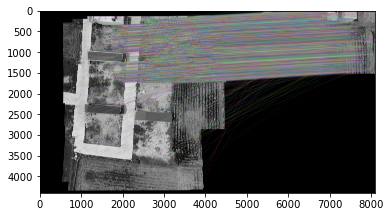

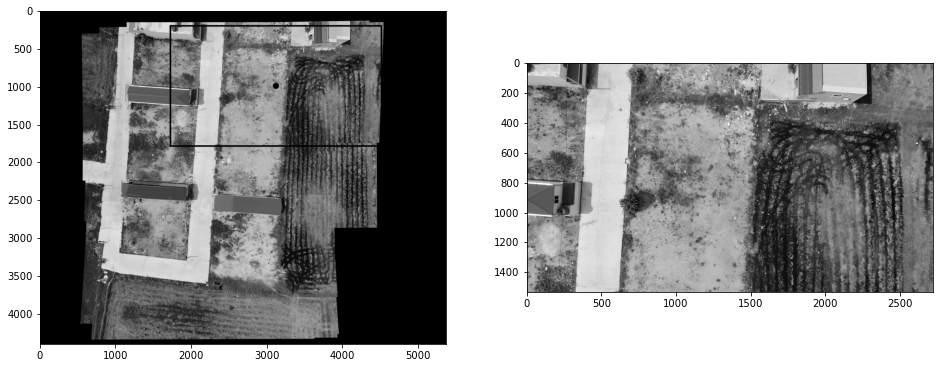

In [15]:
source_img="farm_house_map.jpg"
target_img="img_04.jpg"
sift=Sift_Localization(source_img,target_img)